In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [16]:
df = pd.read_csv('/home/xeon/CLionProjects/LidDrivenCavity/buildDir/cavity_results.csv')
df

,x,y,psi,vorticity,u,v
0,0.0,0.000000,0.0,-0.000901,0.0,0.0
1,0.0,0.007812,0.0,-0.000901,0.0,0.0
2,0.0,0.015625,0.0,-0.003435,0.0,0.0
3,0.0,0.023438,0.0,-0.006563,0.0,0.0
4,0.0,0.031250,0.0,-0.009452,0.0,0.0
...,...,...,...,...,...,...
16636,1.0,0.968750,0.0,-61.824300,1.0,0.0
16637,1.0,0.976562,0.0,-82.461500,1.0,0.0
16638,1.0,0.984375,0.0,-118.003000,1.0,0.0
16639,1.0,0.992188,0.0,-178.642000,1.0,0.0


In [17]:
df_filtered = df[df['y'] == 0.5]
df_filtered = df_filtered.drop(columns=['psi', 'vorticity', 'x', 'y'])

In [18]:
df_filtered = df_filtered.reset_index(drop=True)
df_filtered

,u,v
0,0.000000,0.000000e+00
1,-0.005617,8.275010e-07
2,-0.011038,1.958590e-06
3,-0.016279,2.301040e-06
4,-0.021356,1.011650e-06
...,...,...
124,0.789784,5.411580e-03
125,0.842077,3.042760e-03
126,0.894906,1.340190e-03
127,0.947739,3.266850e-04


In [19]:
filtering = [0,7,8,9,13,22,36,58,64,79,94,109,122,123,124,125,128]
filtering = filtering[::-1]
df_filtered_specific = df_filtered.iloc[filtering]
df_filtered_specific

,u,v
128,1.000000,0.000000
125,0.842077,0.003043
124,0.789784,0.005412
123,0.738493,0.008404
122,0.688603,0.011964
109,0.231214,0.078171
94,-0.001280,0.118260
79,-0.141855,0.101849
64,-0.207755,0.057994
58,-0.210900,0.040813


In [20]:
actual_u = [1.00000, 0.84123, 0.78871, 0.73722, 0.68717, 0.23151, 0.00332, -0.13641, -0.20581, -0.21090, -0.15662, -0.10150, -0.06434, -0.04775, -0.04192, -0.03717, 0.00000]

In [21]:
rmse = np.sqrt(np.mean((df_filtered_specific.u - actual_u) ** 2))

In [22]:
print(f"RMSE: {rmse} at 7200 iterations")
print("Relaxation factor of 1.8 and 100 iterations on the SOR")

RMSE: 0.0025954923006322296 at 7200 iterations
Relaxation factor of 1.8 and 100 iterations on the SOR


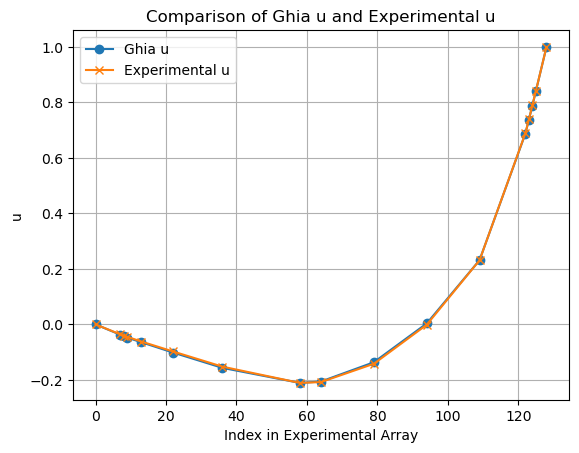

In [23]:
import matplotlib.pyplot as plt

plt.plot(filtering, actual_u, label='Ghia u', marker='o')

plt.plot(filtering, df_filtered_specific.u, label='Experimental u', marker='x')

plt.xlabel('Index in Experimental Array')
plt.ylabel('u')
plt.title('Comparison of Ghia u and Experimental u')
plt.legend()
plt.grid()

plt.show()

In [44]:
def load_results(filename):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)

    x = data[:, 0]
    y = data[:, 1]
    psi = data[:, 2]
    zeta = data[:, 3]
    u = data[:, 4]
    v = data[:, 5]
    N = int(np.sqrt(len(x)))
    X = x.reshape(N, N)
    Y = y.reshape(N, N)
    psi = psi.reshape(N, N)
    zeta = zeta.reshape(N, N)
    u = u.reshape(N, N)
    v = v.reshape(N, N)

    return X, Y, psi, zeta, u, v

In [47]:
def check_continuity(X, Y, u, v):
    dx = X[3, 6] - X[2, 6]
    dy = Y[6, 3] - Y[6, 2]

    du_dx = np.zeros_like(u)
    dv_dy = np.zeros_like(v)

    du_dx[:, 1:-1] = (u[:, 2:] - u[:, :-2]) / (2 * dx)
    dv_dy[1:-1, :] = (v[2:, :] - v[:-2, :]) / (2 * dy)

    divergence = du_dx + dv_dy

    max_divergence = np.max(np.abs(divergence[1:-1, 1:-1]))
    mean_divergence = np.mean(np.abs(divergence[1:-1, 1:-1]))
    print(f"Maximum divergence: {max_divergence:.2e}")
    print(f"Mean divergence: {mean_divergence:.2e}")
    return divergence

Maximum divergence: 8.32e-05
Mean divergence: 1.47e-05


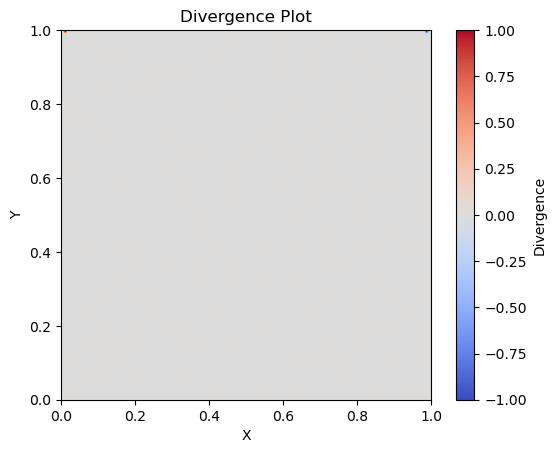

In [49]:
X, Y, psi, zeta, u, v = load_results("/home/xeon/CLionProjects/LidDrivenCavity/buildDir/cavity_results.csv")
divergence = check_continuity(X, Y, u, v)
plt.imshow(np.clip(divergence, -1, 1), extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', cmap='coolwarm')
plt.colorbar(label='Divergence')
plt.title('Divergence Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
